In [2]:
from firstSteps import *
from firstSteps import tools as tls
from firstSteps import parameterEQV2 as para
import numpy as np
from astropy import constants as const
from astropy import units as u
from matplotlib import pyplot as plt
%load_ext autoreload
%autoreload 2

In [3]:
# Set parameters
# Units
cmcubed = 1/ (1 * u.cm ** 3)
kelv = 1 * u.K
grams = 1 * u.g
gauss = 1 * u.cm ** (-1/2) * u.g ** (1/2) * 1/(1*u.s) # Gauss units in cgs
rads = 1 * u.rad
Hz = 1 * u.Hz

# Parameters
n_dens = 1 * cmcubed
b_field = 30 * gauss
theta_b = 60 * (np.pi/180) * rads
theta_e = 10
gamma = theta_e
blkmass = 1.989 * 10 ** 42 *grams # m87 mass
nu = 230 * 10 ** 9 * Hz

In [4]:
# Test each function
print(para.intensity(1))
print(para.j_emission_nu(nu, n_dens, theta_e, theta_b, b_field, gamma))
print(para.j_emission_x(1, n_dens, theta_e, theta_b, b_field, gamma))
print(para.specific_intensity(para.j_emission_nu(nu, n_dens, theta_e, theta_b, b_field, gamma), blkmass))
print(para.bright_temp(nu, 
                       para.specific_intensity(para.j_emission_nu(nu, n_dens, theta_e, theta_b, b_field, gamma), blkmass)))



1.5183165848214117
1.29262057114346e-22 erg / (cm3 Hz s)
3.6795768558053103e-22 erg / (cm3 Hz s)
1.9092823774128894e-07 erg / cm2
11747423.337341838 K


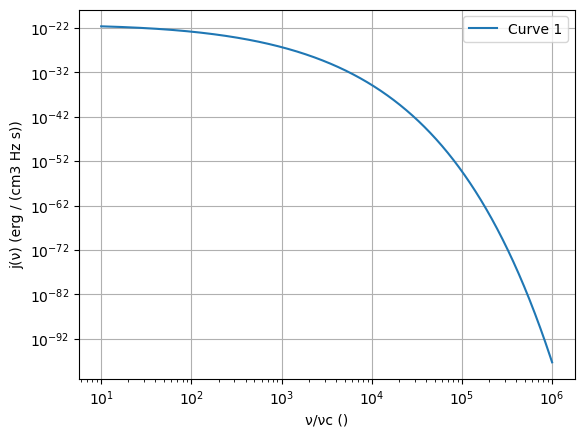

In [5]:
# Plot J emisison coefficient as a function of dimensionless frequency
x_array = np.logspace(1, 6, 1000) * u.dimensionless_unscaled
tls.plot_with_units(x_array, para.j_emission_x(x_array, n_dens, theta_e, theta_b, b_field, gamma), "Curve 1", '\u03BD/\u03BDc', 'j(\u03BD)')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.grid(visible=True)

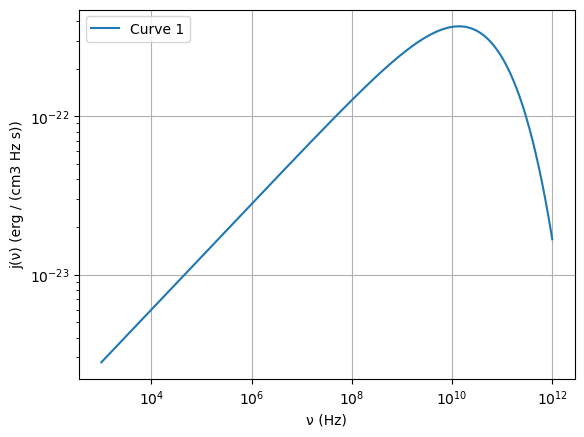

In [6]:
# Plot J emisison coefficient as a function of frequency
nu_array = np.logspace(3, 12, 1000) * Hz
tls.plot_with_units(nu_array, para.j_emission_nu(nu_array, n_dens, theta_e, theta_b, b_field, gamma), "Curve 1", '\u03BD', 'j(\u03BD)')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.grid(visible=True)

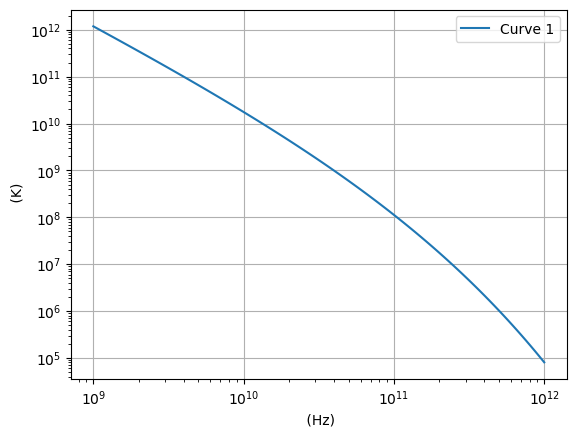

In [7]:
# Plot brightness temperature as a function of frequency
nu_array = np.logspace(9, 12, 100) * Hz
bright_temp = para.bright_temp(nu_array, para.specific_intensity(para.j_emission_nu(nu_array, n_dens, theta_e, theta_b, b_field, gamma), blkmass))
tls.plot_with_units(nu_array, bright_temp, "Curve 1")
plt.legend()
plt.grid(visible=True)
plt.xscale('log')
plt.yscale('log')